# PyTorch Basics

## Init, helpers, utils, ...

In [233]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [234]:
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

from IPython.core.debugger import set_trace

%matplotlib inline

In [235]:
from ppt.utils import attr

# Tensors
tensors - the atoms of machine learning

## Tensors in numpy and pytorch

In [6]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot

In [7]:
import torch

In [8]:
# numpy
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
# torch
torch.eye(3)

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

In [10]:
# numpy
X = np.random.random((5, 3))
X

array([[0.06463623, 0.56656575, 0.70259956],
       [0.74729546, 0.62515303, 0.77975082],
       [0.64286899, 0.84459775, 0.16396079],
       [0.23022068, 0.73877585, 0.81453113],
       [0.70343367, 0.08809581, 0.91078339]])

In [11]:
# pytorch
Y = torch.rand((5, 3))
Y

tensor([[ 0.1972,  0.2545,  0.8438],
        [ 0.4686,  0.2242,  0.1293],
        [ 0.4751,  0.9331,  0.3336],
        [ 0.5976,  0.4208,  0.2790],
        [ 0.7074,  0.4392,  0.1767]])

In [12]:
X.shape

(5, 3)

In [13]:
Y.shape

torch.Size([5, 3])

In [14]:
# numpy
X.T @ X

array([[1.52372937, 1.27881143, 1.56172056],
       [1.27881143, 1.97870904, 1.70600548],
       [1.56172056, 1.70600548, 2.62152799]])

In [15]:
# torch
Y.t() @ Y

tensor([[ 1.3416,  1.1607,  0.6772],
        [ 1.1607,  1.3556,  0.7500],
        [ 0.6772,  0.7500,  0.9490]])

In [16]:
# numpy
inv(X.T @ X)

array([[ 1.94540925, -0.58798065, -0.77629818],
       [-0.58798065,  1.32912716, -0.5146757 ],
       [-0.77629818, -0.5146757 ,  1.17885463]])

In [17]:
# torch
torch.inverse(Y.t() @ Y)

tensor([[ 2.8936, -2.3724, -0.1899],
        [-2.3724,  3.2559, -0.8802],
        [-0.1899, -0.8802,  1.8848]])

## More on PyTorch Tensors

Operations are also available as methods.

In [18]:
A = torch.eye(3)
A.add(1)

tensor([[ 2.,  1.,  1.],
        [ 1.,  2.,  1.],
        [ 1.,  1.,  2.]])

In [19]:
A

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

Any operation that mutates a tensor in-place is post-fixed with an _. For example: x.copy_(y), x.t_(), will change x.

In [20]:
A.add_(1)
A

tensor([[ 2.,  1.,  1.],
        [ 1.,  2.,  1.],
        [ 1.,  1.,  2.]])

## Indexing and broadcasting
It works as expected:

In [21]:
A[0, 0]

tensor(2.)

In [22]:
A[0]

tensor([ 2.,  1.,  1.])

In [23]:
A[0:2]

tensor([[ 2.,  1.,  1.],
        [ 1.,  2.,  1.]])

In [24]:
A[:, 1:3]

tensor([[ 1.,  1.],
        [ 2.,  1.],
        [ 1.,  2.]])

## Converting

In [25]:
A = torch.eye(3)
A

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

In [26]:
# torch --> numpy
A.numpy()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [27]:
# numpy --> torch
torch.from_numpy(np.eye(3))

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]], dtype=torch.float64)

# Autograd - automatic differentiation
We already used it: `loss.backward()`

Prior to `v0.4` PyTorch used the class `Variable` to record gradients by wrapping `Tensor`s.
`Variable`s behaved like `Tensors`.
With `v0.4` `Tensor` can record the gradient if you tell it do do so, e.g. `torch.ones(3, requires_grad=True)`.

Ref:
- https://pytorch.org/docs/stable/autograd.html
- https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [211]:
w = torch.ones(1)
w.requires_grad

False

In [212]:
z = torch.ones(1) * 2
z.requires_grad

False

In [213]:
total = w + z
total

tensor([ 3.])

In [214]:
# What is going to happen here?
total.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [215]:
w = torch.ones(1, requires_grad=True)
w.requires_grad

True

In [216]:
total = w + z
total.requires_grad

True

In [217]:
total.backward()

In [218]:
w.grad

tensor([ 1.])

In [219]:
with torch.no_grad():
    total = w + z

total.requires_grad

False

# But what about the GPU?
How do I use the GPU?

If you have a GPU make sure that the right pytorch is installed

```
conda install pytorch torchvision cuda91 -c pytorch
```
Check https://pytorch.org/ for details.

In [161]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

If you have a GPU you should get something like: 
`device(type='cuda', index=0)`

You can move data to the GPU by doing `.to(device)`.

In [162]:
data = torch.eye(3)
data.to(device)

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]], device='cuda:0')

Note: before `v0.4` one had to use `.cuda()` and `.cpu()` to move stuff to and from the GPU.
This littered the code with many:
```python
if CUDA:
    model = model.cuda()
```

# ML 101 Recap

**model + loss + optimizer**


## Linear regression example

1. Model:
  - $\hat y = X \beta$

2. Loss / criterion:
  - $ err_i = y_i - f(X_i)$
  - $MSE = \frac{1}{n} \sum_{i=1}^{N} err_i^2$
  
3. Optimize:
  - minimize the MSE yields the optimal $\hat\beta$ (after doing some math)
  - $\hat\beta = (X^TX)^{-1}X^Ty$

## ML 101 with numpy

In [28]:
X = np.random.random((5, 3))
y = np.random.random(5)
X.shape, y.shape

((5, 3), (5,))

$\hat\beta = (X^T X)^{-1} X^T y$

In [29]:
XT = X.T  # transpose

beta_ = mdot([inv(XT @ X), XT, y])
beta_

array([ 0.20807639, -0.1709972 ,  0.67518319])

In [30]:
XT = X.T  # transpose

beta_ = inv(XT @ X) @ XT @ y
beta_

array([ 0.20807639, -0.1709972 ,  0.67518319])

The model $f$:

In [31]:
def f(X, beta):
    return X @ beta

f(X, beta_)

array([0.36221447, 0.48853453, 0.42275487, 0.65013452, 0.17915058])

## ML 101 with PyTorch

In [32]:
import torch

In [33]:
# X = torch.rand((5, 3))
X = torch.from_numpy(X)
# y = torch.rand(5)
y = torch.from_numpy(y)
X.shape, y.shape

(torch.Size([5, 3]), torch.Size([5]))

$\hat\beta = (X^T X)^{-1} X^T y$

In [34]:
XT = X.t()

beta__ = (XT @ X).inverse() @ XT @ y
beta__

tensor([ 0.2081, -0.1710,  0.6752], dtype=torch.float64)

In [35]:
beta__.numpy() - beta_

array([-1.44328993e-15,  1.44328993e-15,  1.22124533e-15])

## ML 101 with PyTorch and Gradent Descent

Previously, we had to do some math to calculate the optimal $\hat\beta$.
PyTorch calculates the gradients for us automatically (more on that later)
and we can use some version of gradient desctent to find our $\hat\beta$.

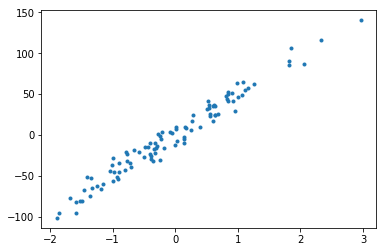

In [101]:
from sklearn.datasets import make_regression

n_features = 1
n_samples = 100

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=10,
)

fix, ax = plt.subplots()
ax.plot(X, y, ".")

In [102]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [103]:
from torch import nn

class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)


model = LinReg(n_features)

In [104]:
criterion = nn.MSELoss()

In [105]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.0001)

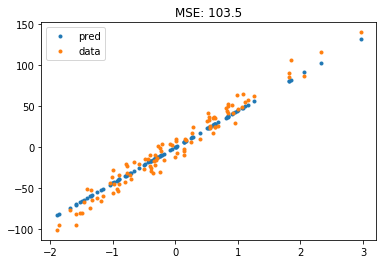

In [151]:
# Train step
model.train()
optimizer.zero_grad()

y_ = model.forward(X)

loss = criterion(y_, y)
loss.backward(loss)
optimizer.step()

# Eval
model.eval()
with torch.no_grad():
    y_ = model(X)
    

# Vis
fig, ax = plt.subplots()
ax.plot(X.numpy(), y_.numpy(), ".", label="pred")
ax.plot(X.numpy(), y.numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

In [152]:
model.beta

Linear(in_features=1, out_features=1, bias=True)

In [153]:
model.beta.weight

Parameter containing:
tensor([[ 44.2467]])

In [154]:
model.beta.weight.data

tensor([[ 44.2467]])

In [157]:
model.beta.bias

Parameter containing:
tensor([ 0.1421])

## LinReg with GPU

Simply move the data and the model to the GPU.

In [236]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = LinReg(n_features).to(device)  # <-- here
optimizer = optim.SGD(model.parameters(), lr=0.00001)
criterion = nn.MSELoss()

X, y = X.to(device), y.to(device)  # <-- here

The rest stays the same.

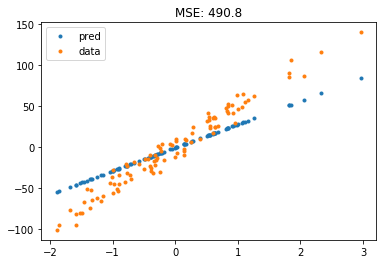

In [210]:
# Train step
model.train()
optimizer.zero_grad()

y_ = model.forward(X)
loss = criterion(y_, y)

loss.backward(loss)
optimizer.step()

# Eval
model.eval()
with torch.no_grad():
    y_ = model(X)    

# Vis
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

# Debugging

**Q: "No debugger for your code. What do you think?"**

**A: "I would NOT be able to code!"**

- Who does "print-line-debugging"?
- Who likes debugging in tensorflow?
- What is the intersection of those two groups?


## IPDB cheatsheet
Taken from http://frid.github.io/blog/2014/06/05/python-ipdb-cheatsheet/

- h(help): Print help

- n(ext): Continue execution until the next line in the current function is reached or it returns.
- s(tep): Execute the current line, stop at the first possible occasion (either in a function that is called or in the current function).
- r(eturn): Continue execution until the current function returns.

- r(eturn): Continue execution until the current function returns.
- a(rgs): Print the argument list of the current function.

In [62]:
from IPython.core.debugger import set_trace

In [63]:
def my_function(x):
    answer = 42
    # set_trace()
    answer += x
    return answer

my_function(12)

54

## Example: debuging a NN

In [64]:
X = torch.rand((5, 3))
X

tensor([[ 0.2107,  0.7328,  0.4285],
        [ 0.7998,  0.3209,  0.5599],
        [ 0.7167,  0.7644,  0.6845],
        [ 0.9939,  0.0771,  0.3096],
        [ 0.7311,  0.2140,  0.3246]])

In [65]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(3, 1)
    
    def forward(self, X):
        # set_trace()
        x = self.lin(X)
        return X

model = MyModule()
y_ = model(X)

# assert y_.shape == (5, 1), y_.shape

# Recap - what we learned so far
- Tensor like numpy
- No need to calculate derivatives - automatic differentiation!
- Machine Learning = model + loss + optimizer
- Use `nn.Module` to create your own networks
- Debuggable!